# Q1
(a)(b)

1. **Normalization Constant $A$**  
   We require  
   $ \int_{-\frac{\pi}{2}}^{\frac{\pi}{2}} A\cos x\,\mathrm{d}x = 1, $  
   which gives  
   $ A = \frac12. $

2. **Cumulative Distribution Function (CDF)**  
   For $x\in[-\frac{\pi}{2},\frac{\pi}{2}]$,  
   $ F(x) = \int_{-\frac{\pi}{2}}^{x} \tfrac12\cos t\,\mathrm{d}t = \tfrac{\sin x + 1}{2}. $

3. **Inverse–Transform Sampling**  
   Let $u\sim U(0,1)$. Setting  
   $ F(x)=u \Longrightarrow \tfrac{\sin x + 1}{2}=u $  
   yields  
   $ \sin x = 2u - 1 \Longrightarrow x = \arcsin(2u - 1). $


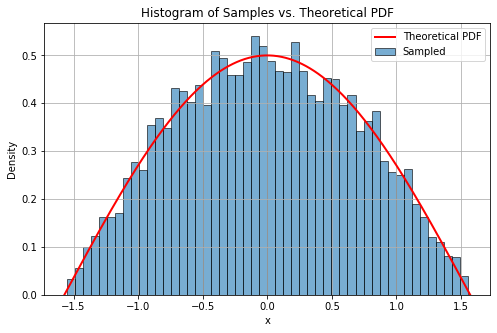

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Normalization constant for PDF P(x) = A * cos(x) on [-pi/2, +pi/2]
A = 0.5

# 2. Number of samples
n_samples = 10000

# 3. Generate uniform random numbers U(0,1)
u = np.random.rand(n_samples)

# 4. Apply the inverse–transform: x = arcsin(2u - 1)
x = np.arcsin(2 * u - 1)

# 5. Plot histogram of the samples
plt.figure(figsize=(8, 5))
plt.hist(x,
         bins=50,
         density=True,
         alpha=0.6,
         edgecolor='black',
         label='Sampled')

# 6. Overlay the theoretical PDF P(x) = (1/2) * cos(x)
x_pdf = np.linspace(-np.pi/2, np.pi/2, 300)
pdf = A * np.cos(x_pdf)
plt.plot(x_pdf, pdf, 'r-', linewidth=2, label='Theoretical PDF')

# 7. Labels and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Samples vs. Theoretical PDF')
plt.legend()
plt.grid(True)
plt.show()


(c)

1. **Cumulative Distribution Function (CDF)**  
   We have  
   $F(x) = \int_{-1}^{x} \tfrac{3}{5}\bigl(1 - \tfrac{t^2}{2}\bigr)\,dt
     = \tfrac{3}{5}\Bigl(t - \tfrac{t^3}{6}\Bigr)\Big|_{-1}^{x}
     = \tfrac{3}{5}\Bigl(x - \tfrac{x^3}{6} + \tfrac{7}{6}\Bigr).$

2. **Inverse–Transform Requirement**  
   To use the transformation method, we must solve  
   $F(x) = u,\quad u\sim U(0,1),$  
   which leads to the cubic equation  
   $x - \tfrac{x^3}{6} + \tfrac{7}{6} = \tfrac{5}{3}\,u.$

3. **Why It Fails Without Cubic Root Formulas**  
   This is a general cubic in $x$, and obtaining an explicit $x = F^{-1}(u)$ requires the cubic formula. Without knowledge of how to solve a general cubic, we cannot express the inverse in closed form, so the transformation method does not work.


（d)

1. **Comparison Function**  
   We choose  
   $$f(x) = \frac{3}{5}\cos x,$$  
   since  
   $$f(x)\ge P(x)=\frac{3}{5}\Bigl(1-\frac{x^2}{2}\Bigr)\quad\text{for }x\in[-1,1].$$

2. **Normalization and Proposal PDF**  
   The normalizing constant is  
   $$
     C = \int_{-1}^{1} f(x)\,\mathrm{d}x
       = \int_{-1}^{1} \frac{3}{5}\cos x\,\mathrm{d}x
       = \frac{3}{5}[\sin x]_{-1}^{1}
       = \frac{6}{5}\sin 1.
   $$  
   Hence the proposal PDF is  
   $$
     g(x) = \frac{f(x)}{C}
          = \frac{\cos x}{2\sin 1},
     \quad x\in[-1,1].
   $$

3. **Acceptance Probability**  
   Each candidate $x\sim g(x)$ is accepted with probability  
   $$
     \frac{P(x)}{f(x)}
     = \frac{\frac{3}{5}\bigl(1-\frac{x^2}{2}\bigr)}{\frac{3}{5}\cos x}
     = \frac{1-\frac{x^2}{2}}{\cos x}.
   $$

4. **Theoretical Acceptance Rate**  
   The overall acceptance rate is  
   $$
     \frac{\displaystyle\int_{-1}^{1}P(x)\,\mathrm{d}x}
          {\displaystyle\int_{-1}^{1}f(x)\,\mathrm{d}x}
     = \frac{1}{C}
     = \frac{5}{6\sin 1}
     \approx 0.9903.
   $$

5. **Simulation**  
   With $N=10000$ trials, the observed acceptance fraction should be close to  
   $$\frac{5}{6\sin 1}\approx 0.9903.$$


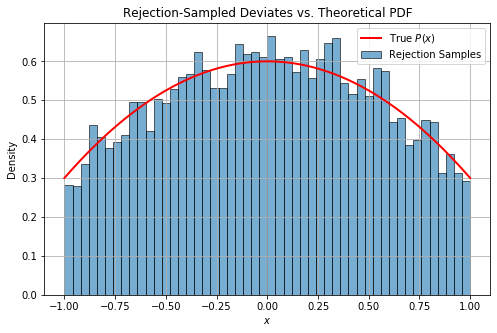

Total proposals: 10095
Number accepted:  10000
Fraction accepted: 0.9906
Area ratio \(\int P/\int f\): 0.9903


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Target PDF and envelope f(x)
def P(x):
    return (3/5) * (1 - x**2/2)

def f(x):
    return (3/5) * np.cos(x)

# Parameters
N_accept = 10000
sin1 = np.sin(1.0)
C = (6/5) * sin1          # ∫_{-1}^1 f(x) dx = (6/5) sin(1)
area_ratio = 1.0 / C      # ∫P(x)/∫f(x)

# Rejection sampling from proposal g(x)=f(x)/C
accepted = []
n_proposals = 0

while len(accepted) < N_accept:
    # batch size: try to generate as many as needed
    batch = N_accept - len(accepted)
    # --- sample from g(x) via inverse CDF of cos(x)/(2 sin1) ---
    u1 = np.random.rand(batch)
    x_prop = np.arcsin(sin1 * (2*u1 - 1))
    # --- acceptance test ---
    u2 = np.random.rand(batch)
    accept = u2 <= (P(x_prop) / f(x_prop))
    accepted.extend(x_prop[accept].tolist())
    n_proposals += batch

# truncate to exactly N_accept
samples = np.array(accepted[:N_accept])

# Compute acceptance fraction
frac_accepted = N_accept / n_proposals

# 1. Histogram + overlay of theoretical P(x)
plt.figure(figsize=(8,5))
plt.hist(samples, bins=50, density=True, alpha=0.6, edgecolor='k',
         label='Rejection Samples')
x_vals = np.linspace(-1, 1, 300)
plt.plot(x_vals, P(x_vals), 'r-', lw=2, label='True $P(x)$')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Rejection‐Sampled Deviates vs. Theoretical PDF')
plt.legend()
plt.grid(True)
plt.show()

# 2. Print results
print(f"Total proposals: {n_proposals}")
print(f"Number accepted:  {N_accept}")
print(f"Fraction accepted: {frac_accepted:.4f}")
print(f"Area ratio \\(\\int P/\\int f\\): {area_ratio:.4f}")


Conclusion: The observed acceptance fraction is indeed very close to the theoretical area‐ratio, as expected.

# Q2
(a)

Let
$$
x = \tan z,\quad z\in\bigl(-\tfrac{\pi}{2},\tfrac{\pi}{2}\bigr).
$$
Then
$$
dx = \sec^2 z\,dz.
$$
Hence
$$
I = \int_{-\infty}^\infty e^{-x^4}\,dx
  = \int_{-\tfrac{\pi}{2}}^{\tfrac{\pi}{2}} e^{-\tan^4 z}\,\sec^2 z\,dz.
$$
So
$$
g(z) = e^{-\tan^4 z}\,\sec^2 z,\quad a=-\tfrac{\pi}{2},\;b=\tfrac{\pi}{2}.
$$
As $z\to\pm\tfrac{\pi}{2}$, let $t=\tfrac{\pi}{2}-|z|$, then $\tan z\sim1/t$, $\sec^2 z\sim1/t^2$, so
$$
g(z)\sim\frac{e^{-1/t^4}}{t^2}\to0.
$$
Therefore
$$
\lim_{z\to a^+}g(z)=0,\quad\lim_{z\to b^-}g(z)=0.
$$


（b)

In [5]:
import numpy as np

# Define the integrand g(z)
def g(z):
    return np.exp(-np.tan(z)**4) * (1 / np.cos(z)**2)

# Composite mid-point rule
def midpoint_rule(f, a, b, N):
    h = (b - a) / N
    mid = a + (np.arange(N) + 0.5) * h
    return h * np.sum(f(mid))

# Adaptive integration using tripling
def integrate_adaptive(f, a, b, tol=1e-6, max_iter=10):
    N = 1
    I_N = midpoint_rule(f, a, b, N)
    
    for i in range(max_iter):
        N *= 3
        I_3N = midpoint_rule(f, a, b, N)
        rel_err = abs(I_3N - I_N) / abs(I_3N)
        if rel_err <= tol:
            return I_3N, N, rel_err
        I_N = I_3N
    
    # 如果迭代未收敛，返回最后一次结果
    return I_3N, N, rel_err

# Integration limits
a = -0.5 * np.pi
b =  0.5 * np.pi

# Compute the integral
result, panels, error = integrate_adaptive(g, a, b, tol=1e-6)

print(f"Integral ≈ {result:.8f}")
print(f"Number of panels used: {panels}")
print(f"Final relative error: {error:.2e}")


Integral ≈ 1.81280495
Number of panels used: 243
Final relative error: 3.65e-12


（c)

In [6]:
import numpy as np

# 1) 被积函数 g(z)
def g(z):
    return np.exp(-np.tan(z)**4) * (1 / np.cos(z)**2)

# 2) 复合中点法
def midpoint_rule(f, a, b, N):
    h = (b - a) / N
    midpoints = a + (np.arange(N) + 0.5) * h
    return h * np.sum(f(midpoints))

# 3) 基于中点法 + 三倍细分 的 Romberg 积分
def romberg_midpoint_triple(f, a, b, tol=1e-6, max_levels=10):
    R = []  # 存放 Romberg 表格，各行长度依次增大
    for i in range(max_levels):
        N = 3**i
        # 第一列：复合中点法
        row = [midpoint_rule(f, a, b, N)]
        # Richardson 外推
        for j in range(1, i+1):
            factor = 3**(2*j)
            Rij = (factor * row[j-1] - R[i-1][j-1]) / (factor - 1)
            row.append(Rij)
        R.append(row)
        # 误差估计（对角线收敛）
        if i > 0:
            err = abs(R[i][i] - R[i-1][i-1]) / abs(R[i][i])
            if err <= tol:
                return R[i][i], i+1, err
    # 若未在 max_levels 内收敛，则返回最后结果
    return R[-1][-1], max_levels, err

# 4) 执行积分
a, b = -0.5 * np.pi, 0.5 * np.pi
result, levels_used, final_err = romberg_midpoint_triple(g, a, b, tol=1e-6)

print(f"Integral ≈ {result:.8f}")
print(f"Levels used: {levels_used}")
print(f"Final relative error: {final_err:.2e}")


Integral ≈ 1.81280495
Levels used: 7
Final relative error: 6.90e-08


（d)

In [7]:
import numpy as np

# 被积函数
def g(z):
    return np.exp(-np.tan(z)**4) / np.cos(z)**2

# 复合梯形公式
def trapezoidal_rule(f, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    y = f(x)
    return h * (0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

# 加倍细分 + 误差估计
def integrate_trap_doubling(f, a, b, tol=1e-6, max_iters=20):
    N = 1
    T_prev = trapezoidal_rule(f, a, b, N)
    for _ in range(max_iters):
        N *= 2
        T_curr = trapezoidal_rule(f, a, b, N)
        rel_err = abs(T_curr - T_prev) / abs(T_curr)
        if rel_err <= tol:
            return T_curr, N, rel_err
        T_prev = T_curr
    return T_curr, N, rel_err

# 设置积分区间
a, b = -0.5 * np.pi, 0.5 * np.pi

# 计算积分
result, panels, error = integrate_trap_doubling(g, a, b, tol=1e-6)

print(f"Integral ≈ {result:.8f}")
print(f"Panels used:     {panels}")
print(f"Final rel. err:  {error:.2e}")


Integral ≈ 1.81280495
Panels used:     128
Final rel. err:  3.00e-10


（e)

In [8]:
import numpy as np
from numpy.polynomial.legendre import leggauss

# 1) 被积函数 g(z)（同前）
def g(z):
    return np.exp(-np.tan(z)**4) / np.cos(z)**2

# 2) Gaussian Quadrature over [a,b] via n-point Gauss–Legendre
def gaussian_quad(f, a, b, n):
    # nodes and weights on [-1,1]
    t, w = leggauss(n)
    # map to [a,b]
    x = 0.5*(b + a) + 0.5*(b - a)*t
    return 0.5*(b - a) * np.dot(w, f(x))

# 3) 自适应增加节点直到满足相对误差 tol
def integrate_gauss(f, a, b, tol=1e-6, max_n=1024):
    n = 4
    I_old = gaussian_quad(f, a, b, n)
    while n <= max_n:
        n *= 2
        I_new = gaussian_quad(f, a, b, n)
        rel_err = abs(I_new - I_old) / abs(I_new)
        if rel_err <= tol:
            return I_new, n, rel_err
        I_old = I_new
    # 若达到 max_n 仍未收敛，则返回当前结果
    return I_new, n, rel_err

# 4) 执行积分
a, b = -0.5 * np.pi, 0.5 * np.pi
result, nodes_used, final_err = integrate_gauss(g, a, b, tol=1e-6)

print(f"Integral ≈ {result:.8f}")
print(f"Planes (n) used: {nodes_used}")
print(f"Final relative error: {final_err:.2e}")


Integral ≈ 1.81280495
Planes (n) used: 128
Final relative error: 2.54e-09


（f)

In [9]:
import numpy as np
from math import gamma, sqrt, pi

# 1) 常数 Z = ∫ e^{-x^4} dx on R
Z1 = 0.5 * gamma(0.25)       # = ∫_{-∞}^{∞} e^{-x^4} dx
Z4 = Z1**4                   # for 4 dims

# 2) 一维目标边际 f(x) ∝ exp(-x^4)，用 N(0,1) 提议分布接受–拒绝抽样
M = sqrt(2*pi) * np.exp(1/16)

def sample_x1(n):
    """Draw n samples from density ∝ exp(-x^4) by rejection sampling."""
    samples = []
    while len(samples) < n:
        m = int((n - len(samples)) * 1.2)  # 多试一点以加速
        x_prop = np.random.randn(m)       # N(0,1) 提议
        # acceptance probability
        log_r = -x_prop**4 + 0.5*x_prop**2 - 1/16
        u = np.random.rand(m)
        keep = u < np.exp(log_r)
        samples.extend(x_prop[keep].tolist())
    return np.array(samples[:n])

# 3) Monte Carlo 主流程
N = 10**6
# 每个维度独立抽样
X1 = sample_x1(N)
X2 = sample_x1(N)
X3 = sample_x1(N)
X4 = sample_x1(N)

# 计算 h = 1/(1 + sum xi^2)
r2 = X1**2 + X2**2 + X3**2 + X4**2
h  = 1.0 / (1.0 + r2)

# 期望和标准误差
h_mean = h.mean()
h_std  = h.std(ddof=1)

I_est   = Z4 * h_mean
err_est = Z4 * h_std / np.sqrt(N)

print(f"I ≈ {I_est:.6f} ± {err_est:.6f}  (1σ)")


I ≈ 5.048008 ± 0.001578  (1σ)
